<a href="https://colab.research.google.com/github/antwoor/ds_lessons/blob/master/CRossVAlGAZ_CTPO_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neural_network import MLPRegressor

In [ ]:
!pip3 install keras

# Фильтрация данных

#обязательная часть фильтрации

In [ ]:
df = pd.read_csv('target_columns - target_columns.csv.csv')
df1 = pd.read_csv('train_columns - dincolumns.csv.csv')
df1 = df1.drop(columns=['Data_time'])
df = pd.concat([df, df1], axis = 1)
df = df.set_index('Data_time')
df = df.replace({'LIMS:KUPN.U100.SN125.HardnessCarb_DEL':{'Pt Created':1, 'Scan Off':0}}) #В этих столбцах буквенные данные, заменим их
df= df.replace({'LIMS:KUPN.U100.SN125.MSAlkali_DEL':{'Pt Created':1, 'Scan Off': 0}})
df

,LIMS:KUPN.U100.V107.ChlIons,LIMS:KUPN.U100.V107.H2S,KUPN:U100.HS1106.PV,KUPN:U100.PDIC1274.PV,KUPN:U100.PI1162.PV,KUPN:U100.PI1203.PV,KUPN:U100.PI1204.PV,KUPN:U100.PI1210.PV,KUPN:U100.PI1291.PV,KUPN:U100.PI1310.PV,...,KUPN:U100.FI1166.PV,KUPN:U100.FRC1025.PV,KUPN:U100.FIC1035.PV,KUPN:U100.FIC1036.PV,KUPN:U100.FRC1037.PV,KUPN:U100.FI1117B.PV,KUPN:U100.FI1118.PV,KUPN:U100.FI1111.PV,KUPN:U100.FIC1116.PV,KUPN:U100.FIC1172.PV
Data_time,,,,,,,,,,,,,,,,,,,,,
25-мая-21 0:00:00,162.336197,39.468300,345.481598,0.038465,1.444188,0.100056,0.105812,0.110922,0.139721289,0.152406,...,109.1317673,327.292419,81.5743866,98.05956268,89.84387207,2.134461164,189.3636627,1682.745483,30.622585,0.003488
26-мая-21 0:00:00,160.542419,39.468300,344.599152,0.038046,1.399035,0.110166,0.117260,0.126834,0.153443679,0.166530,...,109.4044266,463.314880,128.7409973,143.7584076,136.2638245,3.620295525,233.6170654,1425.001831,29.858221,0.000000
27-мая-21 0:00:00,169.511276,39.468300,345.839996,0.038055,1.386273,0.110397,0.117344,0.127421,0.154085562,0.166866,...,108.1156845,465.035431,133.0298615,153.459671,143.1854858,3.598285675,268.9940796,1462.280151,30.378624,0.000000
28-мая-21 0:00:00,216.149292,39.468300,344.816101,0.037776,1.370610,0.110368,0.117367,0.127148,0.154602438,0.167035,...,109.9880753,465.144379,131.9788361,147.0431061,139.4654388,2.107584953,197.2192688,1673.172485,32.306293,0.000000
29-мая-21 0:00:00,216.149292,39.468300,343.601105,0.037885,1.347526,0.112131,0.119872,0.129436,0.156566545,0.169369,...,106.5452042,470.025055,133.2285919,148.3904419,140.9458771,1.176783442,244.5436249,1752.029663,30.211363,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-мар.-23 0:00:00,6.030050,49.184799,345.265411,0.105786,1.371867,0.096691,0.106170,0.113633,0.137852699,0.146062,...,469.6324768,367.305633,128.3315735,170.9963531,149.5726776,3.614688873,171.0221252,2133.927734,12.440338,1.506279
11-мар.-23 0:00:00,5.136710,49.184799,345.722748,0.104554,1.370831,0.100912,0.109762,0.117047,0.141446516,0.149801,...,469.6614685,368.773651,131.8442383,174.093399,153.074585,Bad,198.544693,2118.549805,16.437662,1.494170
12-мар.-23 0:00:00,5.136710,49.184799,346.718750,0.104880,1.371115,0.098509,0.107574,0.115409,0.139031798,0.147340,...,466.9835815,367.093475,128.5199738,170.0335541,149.6160126,3.69659543,200.3907623,2203.381348,9.673572,1.483954


In [ ]:
for i in range(0, 365):
  df = df[df[df.columns[i]] !='Bad']

In [ ]:
df = df.replace('No Data', np.nan)
df = df.replace('Pt Created', np.nan)
df = df.replace('Bad', np.nan)
for column in df.columns:
    # Проверим тип каждого столбца и если он не float, то изменим его
    if df[column].dtype != 'float':
        df[column] = df[column].astype(float)
df

,LIMS:KUPN.U100.V107.ChlIons,LIMS:KUPN.U100.V107.H2S,KUPN:U100.HS1106.PV,KUPN:U100.PDIC1274.PV,KUPN:U100.PI1162.PV,KUPN:U100.PI1203.PV,KUPN:U100.PI1204.PV,KUPN:U100.PI1210.PV,KUPN:U100.PI1291.PV,KUPN:U100.PI1310.PV,...,KUPN:U100.FI1166.PV,KUPN:U100.FRC1025.PV,KUPN:U100.FIC1035.PV,KUPN:U100.FIC1036.PV,KUPN:U100.FRC1037.PV,KUPN:U100.FI1117B.PV,KUPN:U100.FI1118.PV,KUPN:U100.FI1111.PV,KUPN:U100.FIC1116.PV,KUPN:U100.FIC1172.PV
Data_time,,,,,,,,,,,,,,,,,,,,,
26-апр.-22 0:00:00,15.28782,37.410900,354.500977,0.065521,1.426150,0.113482,0.122823,0.130408,0.154875,0.154193,...,423.115936,370.687164,126.541565,159.315506,142.749725,3.151869,283.159760,2217.472656,24.939987,0.816820
27-апр.-22 0:00:00,6.42532,37.410900,353.529602,0.065251,1.428758,0.113598,0.123069,0.130664,0.154450,0.154165,...,422.602020,369.937470,123.660889,160.051209,141.749512,3.255650,297.969086,2266.069824,28.791265,0.776425
28-апр.-22 0:00:00,7.31157,37.410900,355.351501,0.065275,1.427153,0.111805,0.121409,0.128545,0.154075,0.152631,...,422.586426,371.666321,123.630844,158.099091,141.062882,3.169565,251.577820,2281.696777,31.643087,0.797085
29-апр.-22 0:00:00,5.45044,37.410900,354.813690,0.065178,1.424395,0.111264,0.120665,0.128313,0.153366,0.152235,...,422.980957,370.694183,133.508148,160.453827,146.944672,1.325266,241.871735,2331.101563,30.890968,0.795841
30-апр.-22 0:00:00,6.86844,37.410900,354.346161,0.149995,1.421896,0.110237,0.119576,0.127220,0.147945,0.150938,...,423.168121,371.294952,131.379318,160.513123,145.906052,3.787017,264.556458,2319.747559,5.588551,0.931815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-февр.-23 0:00:00,10.20960,58.289902,344.395721,0.120128,1.268166,0.108424,0.117592,0.128079,0.149044,0.158235,...,501.823914,459.912048,188.645569,193.635544,191.045013,1.334178,213.535278,2188.783936,13.069855,1.044443
27-февр.-23 0:00:00,11.11712,32.188202,346.353577,0.104955,1.303241,0.105938,0.115166,0.126074,0.146209,0.156833,...,490.401642,447.407288,170.667679,191.047257,180.787262,3.980845,190.190124,2255.636963,10.722054,1.349018
01-мар.-23 0:00:00,4.24783,27.469000,346.402161,0.105296,1.313243,0.105830,0.115902,0.126274,0.147136,0.157322,...,481.930695,438.714844,166.703491,189.905487,178.288864,2.626880,195.083847,2233.287598,18.682562,1.427447


#Восстановим недостающий хлор с помощью линейной регрессии

In [ ]:
df_fl_df = df.dropna()
Xforfit = df[['LIMS:KUPN.U100.SN101.%Mass.Sulfur','LIMS:KUPN.U100.SN101.Chlorides','LIMS:KUPN.U100.SN101.Water','LIMS:KUPN.U100.V107.ChlIons','LIMS:KUPN.U100.V107.H2S']]
Xdf = df_fl_df[['LIMS:KUPN.U100.SN101.%Mass.Sulfur','LIMS:KUPN.U100.SN101.Chlorides','LIMS:KUPN.U100.SN101.Water','LIMS:KUPN.U100.V107.ChlIons','LIMS:KUPN.U100.V107.H2S']]
Ydf = df_fl_df[['LIMS:KUPN.U100.SN101.%Mass.Chlorides']]
Ydf.isna().any()
LinReg = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(Xdf, Ydf, test_size=0.3, random_state=47)
LinReg.fit(X_train, Y_train)
LinReg.score(X_test, Y_test)
Ydfpredicted = LinReg.predict(Xforfit ).flatten()
Ydfpredicted = pd.Series(Ydfpredicted)
Ydfpredicted.index = df.index
df['LIMS:KUPN.U100.SN101.%Mass.Chlorides'] = df['LIMS:KUPN.U100.SN101.%Mass.Chlorides'].fillna(value = pd.Series(Ydfpredicted))
LinReg.score(X_train, Y_train)
df['LIMS:KUPN.U100.SN101.%Mass.Chlorides']
df.describe(include = "all")

,LIMS:KUPN.U100.V107.ChlIons,LIMS:KUPN.U100.V107.H2S,KUPN:U100.HS1106.PV,KUPN:U100.PDIC1274.PV,KUPN:U100.PI1162.PV,KUPN:U100.PI1203.PV,KUPN:U100.PI1204.PV,KUPN:U100.PI1210.PV,KUPN:U100.PI1291.PV,KUPN:U100.PI1310.PV,...,KUPN:U100.FI1166.PV,KUPN:U100.FRC1025.PV,KUPN:U100.FIC1035.PV,KUPN:U100.FIC1036.PV,KUPN:U100.FRC1037.PV,KUPN:U100.FI1117B.PV,KUPN:U100.FI1118.PV,KUPN:U100.FI1111.PV,KUPN:U100.FIC1116.PV,KUPN:U100.FIC1172.PV
count,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,...,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02
mean,-2.442491e-16,6.294482e-16,-6.188287e-16,-3.456173e-16,2.546680e-15,-1.726155e-15,-1.618029e-15,-2.089150e-15,6.159324e-16,-6.371715e-16,...,-1.641199e-16,9.094175e-16,-2.236858e-15,3.424797e-16,3.929224e-16,1.544658e-17,3.282399e-17,3.325842e-16,4.431238e-16,-7.723291e-18
std,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,...,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00,1.004376e+00
min,-1.433888e+00,-1.947240e+00,-1.964982e+00,-2.676195e+00,-3.748344e+00,-3.479159e+00,-3.536147e+00,-3.641301e+00,-3.207245e+00,-3.620265e+00,...,-1.264528e+00,-3.628084e+00,-2.702753e+00,-3.334865e+00,-3.071629e+00,-2.099517e+00,-1.633292e+00,-1.893174e+00,-1.822949e+00,-1.330231e+00
25%,-7.414583e-01,-8.307290e-01,-7.512055e-01,-3.740605e-01,-5.390787e-01,-4.617708e-01,-4.407789e-01,-4.973076e-01,-5.570418e-01,-6.154253e-01,...,-1.264528e+00,-7.072447e-01,-7.224419e-01,-8.178767e-01,-7.779941e-01,-8.208346e-01,-6.834666e-01,-6.964298e-01,-8.927976e-01,-1.237850e+00
50%,-1.218414e-01,-9.141223e-02,-3.096028e-01,2.101557e-01,-6.050458e-02,1.373161e-02,4.431321e-02,-5.508062e-03,-1.030823e-01,-3.528900e-02,...,6.360002e-01,3.774746e-02,-8.737910e-02,9.030794e-02,2.519754e-01,2.368626e-01,-2.627247e-01,-1.415672e-01,-3.478953e-01,3.707223e-01
75%,4.899884e-01,6.802259e-01,8.980706e-01,5.973664e-01,6.893754e-01,6.358616e-01,6.226873e-01,7.777954e-01,6.928364e-01,6.887127e-01,...,8.246659e-01,9.353331e-01,7.402975e-01,7.913075e-01,6.335285e-01,7.599517e-01,3.655524e-01,7.481720e-01,1.148421e+00,8.377743e-01
max,2.893801e+00,3.714904e+00,2.451771e+00,2.170719e+00,3.396768e+00,2.564301e+00,2.490495e+00,2.402373e+00,3.058540e+00,2.941372e+00,...,9.668740e-01,1.387198e+00,1.982646e+00,1.579973e+00,1.740796e+00,1.437592e+00,3.909766e+00,3.410102e+00,1.808401e+00,2.000100e+00


In [ ]:
df['LIMS:KUPN.U100.SN101.%Mass.Chlorides'].head(20)

0     0.029537
1     0.437143
2     0.165406
3     0.029537
4    -0.242201
5    -0.242201
6     0.029537
7    -0.649808
8    -0.242201
9     0.029537
10   -0.513939
11    0.165406
12    0.029537
13    0.029537
14   -0.649808
15   -0.513939
16    0.165406
17   -0.106332
18   -0.106332
19   -0.242201
Name: LIMS:KUPN.U100.SN101.%Mass.Chlorides, dtype: float64

In [ ]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
train_col = df.drop(['LIMS:KUPN.U100.V107.ChlIons', 'LIMS:KUPN.U100.V107.H2S'], axis=1)
tg_col = df[['LIMS:KUPN.U100.V107.ChlIons']]
X = train_col
Y = tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)

In [ ]:
from sklearn.linear_model import ElasticNetCV
regrChlIon = ElasticNetCV(cv=17, random_state=0, max_iter=10000).fit(X_train, Y_train.values.ravel())
regrChlIon.score(X_train, Y_train)

0.6478051578795732

In [ ]:
regrChlIon.score(X_test, Y_test)

0.29165270879900984

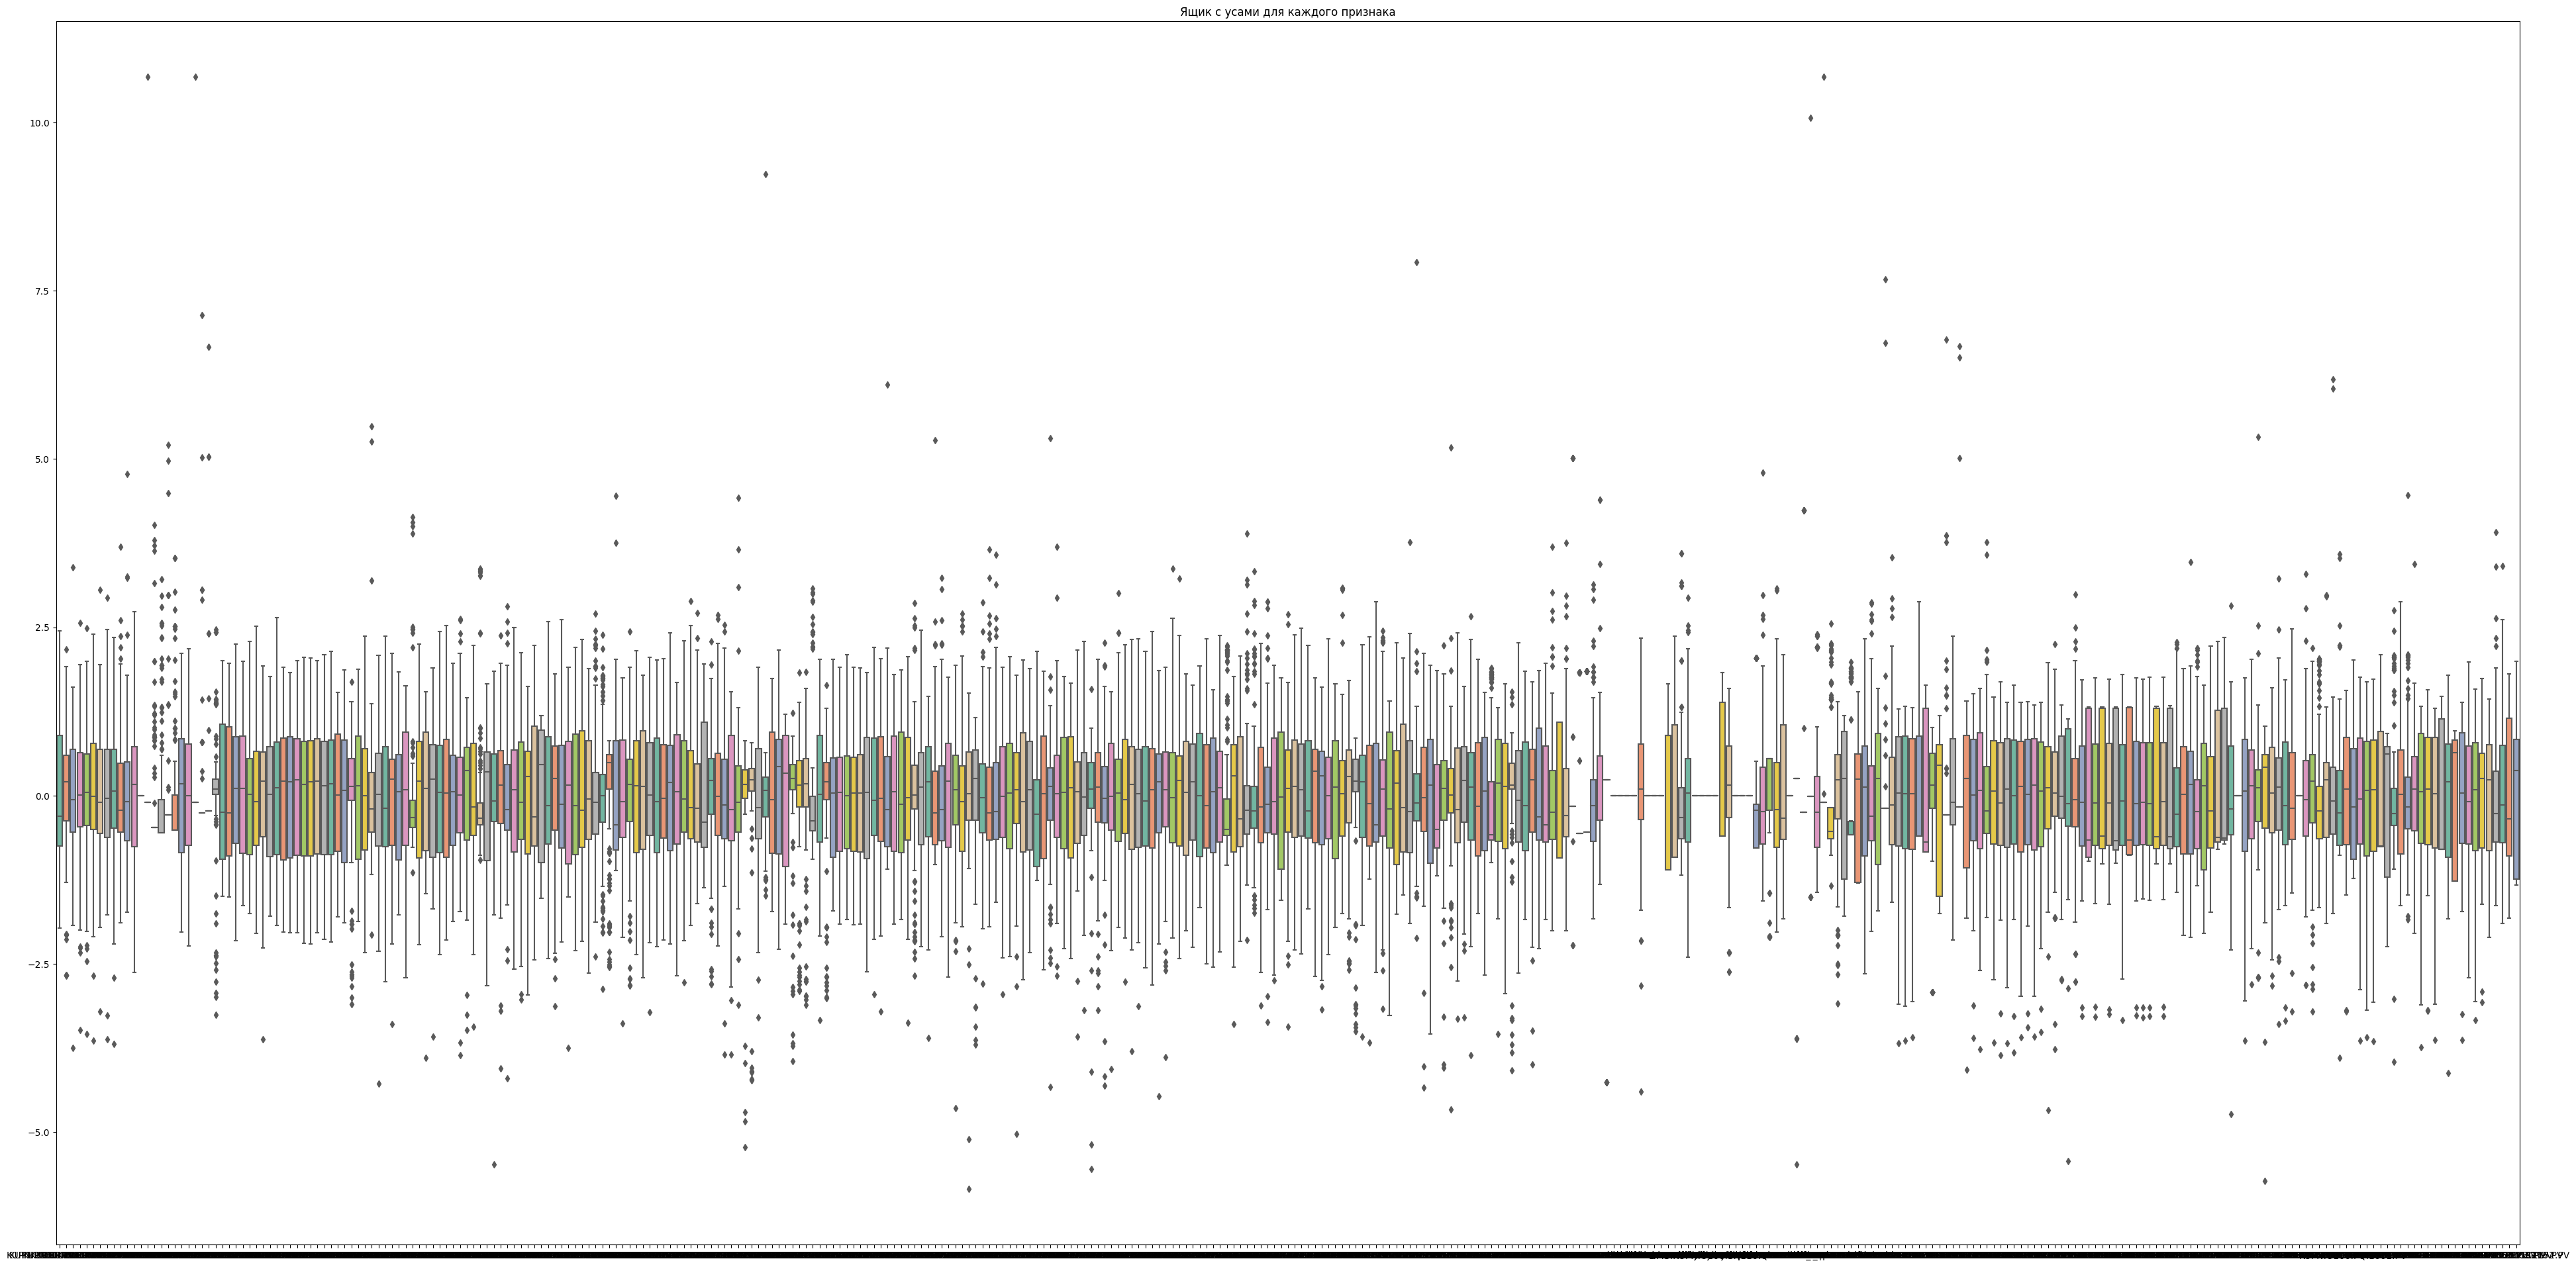

In [ ]:
fig, ax = plt.subplots(figsize=(48, 24))
sns.boxplot(data=X, orient="v", palette="Set2")
plt.title('Ящик с усами для каждого признака')
plt.show()

In [ ]:
regrChlIon.coef_

#необязательная часть фильтрации

In [ ]:
keffs = regrChlIon.coef_
kindex = np.nonzero(keffs)
tuple(kindex)

(array([ 19,  21,  22,  62,  67,  80,  82,  96, 103, 111, 122, 156, 170,
        178, 179, 190, 200, 204, 208, 212, 239, 269, 270, 275, 277, 280,
        314, 332, 333, 334, 336, 345, 358]),)

In [ ]:
df_needChlion = df.iloc [:, [ 19,  21,  22,  62,  67,  80,  82,  96, 103, 111, 122, 156, 170,
        178, 179, 190, 200, 204, 208, 212, 239, 269, 270, 275, 277, 280,
        314, 332, 333, 334, 336, 345, 358]]
df_needChlion

,KUPN:U100.PI1875.PV,KUPN:U100.PI1878.PV,KUPN:U100.PI1879.PV,KUPN:U100.TI1063.PV,KUPN:U100.TI1068.PV,KUPN:U100.TI1082.PV,KUPN:U100.TI1084.PV,KUPN:U100.TI1134.PV,KUPN:U100.TI1151.PV,KUPN:U100.TI1182.PV,...,KUPN:U100.FIC1003.PV,KUPN:U100.FI1167A.PV,KUPN:U100.FI1016.PV,KUPN:U100.FI1106.PV,KUPN:U250.FI2531.PV,KUPN:U250.FI2515.PV,KUPN:U300.FI3079.PV,KUPN:U100.FI1009.PV,KUPN:U100.FIC1181.PV,KUPN:U100.FIC1036.PV
0,-0.509783,-0.237982,-0.093659,-0.480760,0.471650,-0.351012,0.216824,-0.871698,-4.836100,-0.391127,...,-0.619849,-0.686353,-0.286117,-1.378886,0.0,-0.013335,-0.123563,0.206277,-1.212324,-0.756819
1,-0.509783,-0.352982,-0.093659,-0.831261,-0.067321,-0.398119,0.088940,0.184715,-4.697231,-0.414951,...,-0.631921,-0.702393,-0.286117,-1.436305,0.0,0.151315,-0.035831,0.210388,-1.208815,-0.713966
2,-0.509783,0.349234,-0.093659,-1.849806,-1.774985,-0.578109,-0.167931,1.354804,-5.223640,0.210452,...,-0.589102,-0.693254,-0.286117,-1.062024,0.0,0.094827,0.050523,0.212502,-1.206816,-0.827673
3,-0.509783,1.270565,-0.093659,-1.757419,-1.509035,-0.340676,0.112687,2.713665,-0.105346,-0.031106,...,-0.670891,-0.688152,-0.286117,-0.805913,0.0,0.276517,-1.124103,0.291248,-1.210755,-0.690514
4,-0.509783,-0.759941,-0.093659,-1.724771,-1.444550,-0.525559,-0.443417,1.371334,-0.133432,-1.897327,...,-0.682931,-0.690221,-0.286117,-0.856854,0.0,0.179998,-0.212023,0.346358,-1.216456,-0.687060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,-0.509783,1.270565,-0.093659,0.714881,0.506046,-1.818584,-1.653159,-0.868871,-0.095694,-0.077121,...,1.268488,-0.686338,1.873943,-0.364433,0.0,0.698278,-1.944513,-1.883952,0.282291,1.242264
111,-0.509783,-1.243680,-0.093659,1.004329,0.388705,-2.059599,-2.035312,-0.201066,-0.161897,0.071999,...,0.859410,-0.685639,3.864558,-0.621967,0.0,0.448280,-0.143635,-1.889340,0.832046,1.091501
112,-0.509783,-0.740831,-0.093659,1.074398,0.433265,-1.977145,-1.934556,-0.271735,-0.198360,-0.079600,...,0.656033,-0.693279,3.864387,-0.672925,0.0,-0.602793,-2.194337,-1.526666,0.635892,1.024995
113,-0.509783,-1.116900,-0.093659,0.621231,-0.074667,-2.006773,-1.830391,-0.536892,-0.105302,0.167926,...,-0.190668,-0.684601,3.770470,-1.359679,0.0,-1.672842,-1.701559,-1.803030,-0.275554,0.907066


<Axes: >

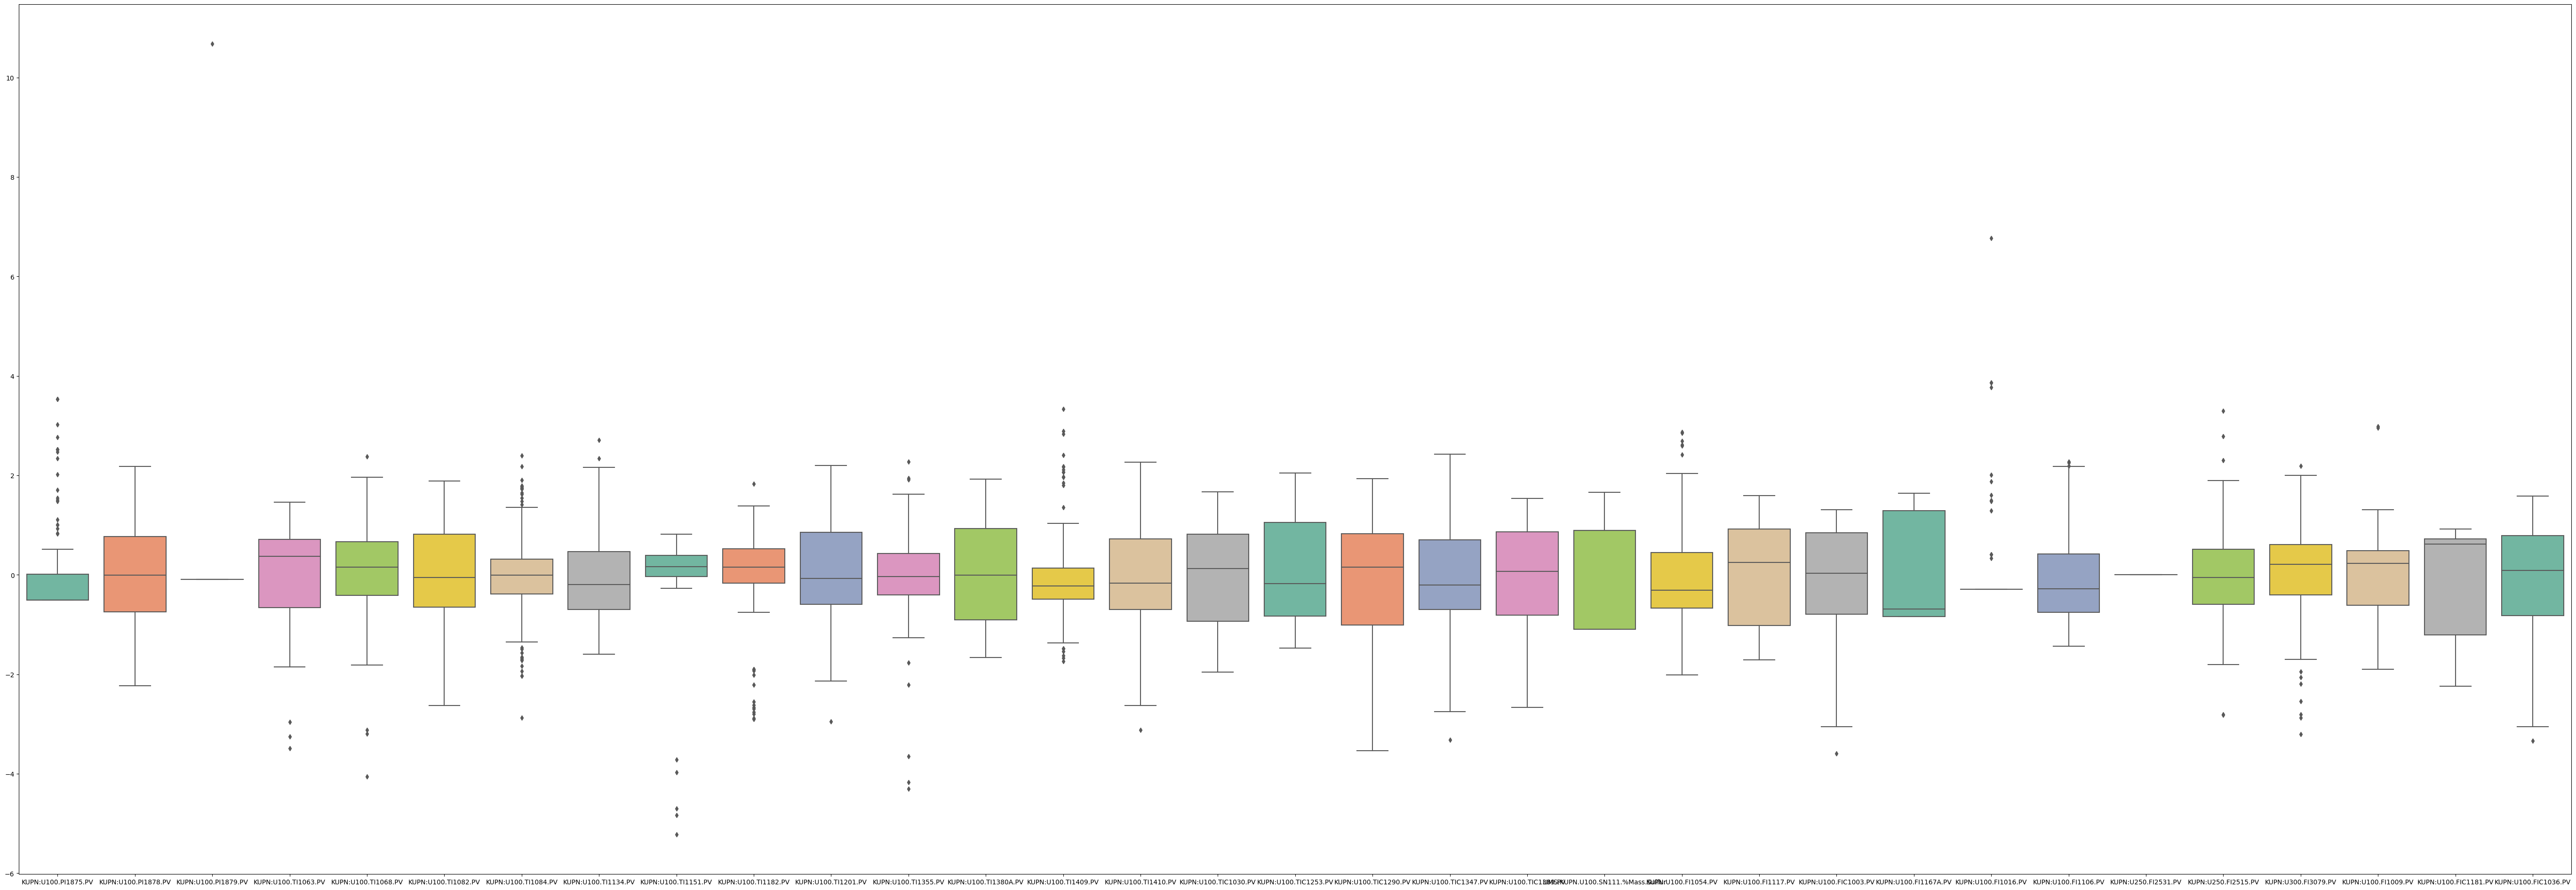

In [ ]:
fig, ax = plt.subplots(figsize=(70, 24))
plot_df_needChlion = sns.boxplot(data=df_needChlion, orient="v", palette="Set2")
plot_df_needChlion

In [ ]:
train_col = df.drop(['LIMS:KUPN.U100.V107.ChlIons', 'LIMS:KUPN.U100.V107.H2S'], axis=1)
tg_col = df[['LIMS:KUPN.U100.V107.H2S']]
X = train_col
Y = tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
regrH2S = ElasticNetCV(cv=5, random_state=0).fit(X_train, Y_train)
regrH2S.score(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7898988067138786

In [ ]:
Hkeffs = regrH2S.coef_
Hkindex = np.nonzero(Hkeffs)
tuple(Hkindex)

(array([  2,  10,  16,  46,  52,  62,  67,  73, 135, 164, 179, 191, 196,
        199, 200, 206, 209, 218, 220, 222, 223, 227, 251, 253, 260, 267,
        269, 278, 280, 294, 344, 345, 360]),)

In [ ]:
df_needH2S = df.iloc [:, [  2,  10,  16,  46,  52,  62,  67,  73, 135, 164, 179, 191, 196,
        199, 200, 206, 209, 218, 220, 222, 223, 227, 251, 253, 260, 267,
        269, 278, 280, 294, 344, 345, 360]]
df_needH2S

,KUPN:U100.HS1106.PV,KUPN:U100.PI1312.PV,KUPN:U100.PI1868.PV,KUPN:U100.TI1043.PV,KUPN:U100.TI1049.PV,KUPN:U100.TI1063.PV,KUPN:U100.TI1068.PV,KUPN:U100.TI1074.PV,KUPN:U100.TI1285.PV,KUPN:U100.TI1365.PV,...,LIMS:KUPN.U100.SN131.%Mass.H2S,LIMS:KUPN.U250.SN262.%Vol.H2S,KUPN:U100.FI1214.PV,KUPN:U100.FI1054.PV,KUPN:U100.FI1167B.PV,KUPN:U100.FI1016.PV,KUPN:U100.FIC1195.PV,KUPN:U100.FIC1013.PV,KUPN:U100.FIC1181.PV,KUPN:U100.FI1117B.PV
0,1.371559,0.041577,-0.472175,-0.962181,-1.109808,-0.480760,0.471650,-0.942689,-0.502623,-1.682769,...,0.088995,10.071715,-1.294861,-0.586425,-0.296647,-0.286117,-0.704122,1.737844,-1.212324,0.665202
1,1.133201,0.079185,-0.472175,-0.935340,-1.059189,-0.831261,-0.067321,-0.997399,-0.471745,-1.517596,...,-0.026512,-0.009768,-1.294014,-0.592057,-0.287422,-0.286117,-0.617680,1.817940,-1.208815,0.756721
2,1.580263,-0.171946,-0.472175,-1.236296,-1.305485,-1.849806,-1.774985,-1.069674,-0.636967,-1.526526,...,-1.185206,-0.009768,-1.295169,-0.601151,-0.282647,-0.286117,-0.473374,2.015650,-1.206816,0.680808
3,1.448294,-0.213147,-0.472175,-1.462322,-1.491830,-1.757419,-1.509035,-1.064213,-1.291949,-0.908158,...,-0.357337,-0.009768,-1.295993,-0.276861,-0.269365,-0.286117,-0.600887,2.098310,-1.210755,-0.945569
4,1.333570,-0.386709,-0.472175,-1.805635,-1.712946,-1.724771,-1.444550,-1.038591,-1.194797,-2.047338,...,0.045932,-0.009768,-1.293916,-0.121999,-0.287892,-0.286117,-0.612389,2.088571,-1.216456,1.225301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,-1.108091,-0.496421,1.997521,-0.288448,-0.871041,0.714881,0.506046,0.924900,-0.364196,-1.370284,...,0.070079,-1.502789,0.631161,-0.372720,0.550340,1.873943,1.122292,0.769493,0.282291,-0.937711
111,-0.627668,-0.675547,1.323967,-0.517941,-0.974694,1.004329,0.388705,0.971965,2.440240,-0.899833,...,-0.205407,-1.502789,0.301299,-0.361438,0.452865,3.864558,0.963858,0.768080,0.832046,1.396227
112,-0.615747,-0.615134,1.198061,-0.402369,-0.855214,1.074398,0.433265,0.961729,2.518657,-0.580937,...,-0.071185,-1.502789,0.326416,-1.212721,0.386545,3.864387,0.754197,0.770384,0.635892,0.202246
113,-0.876802,-1.068520,1.099450,-0.157408,-0.663910,0.621231,-0.074667,0.946271,1.020162,-0.815984,...,0.049956,-1.502789,0.167891,-1.042028,0.074791,3.770470,-0.127197,0.767306,-0.275554,0.236863


<Axes: >

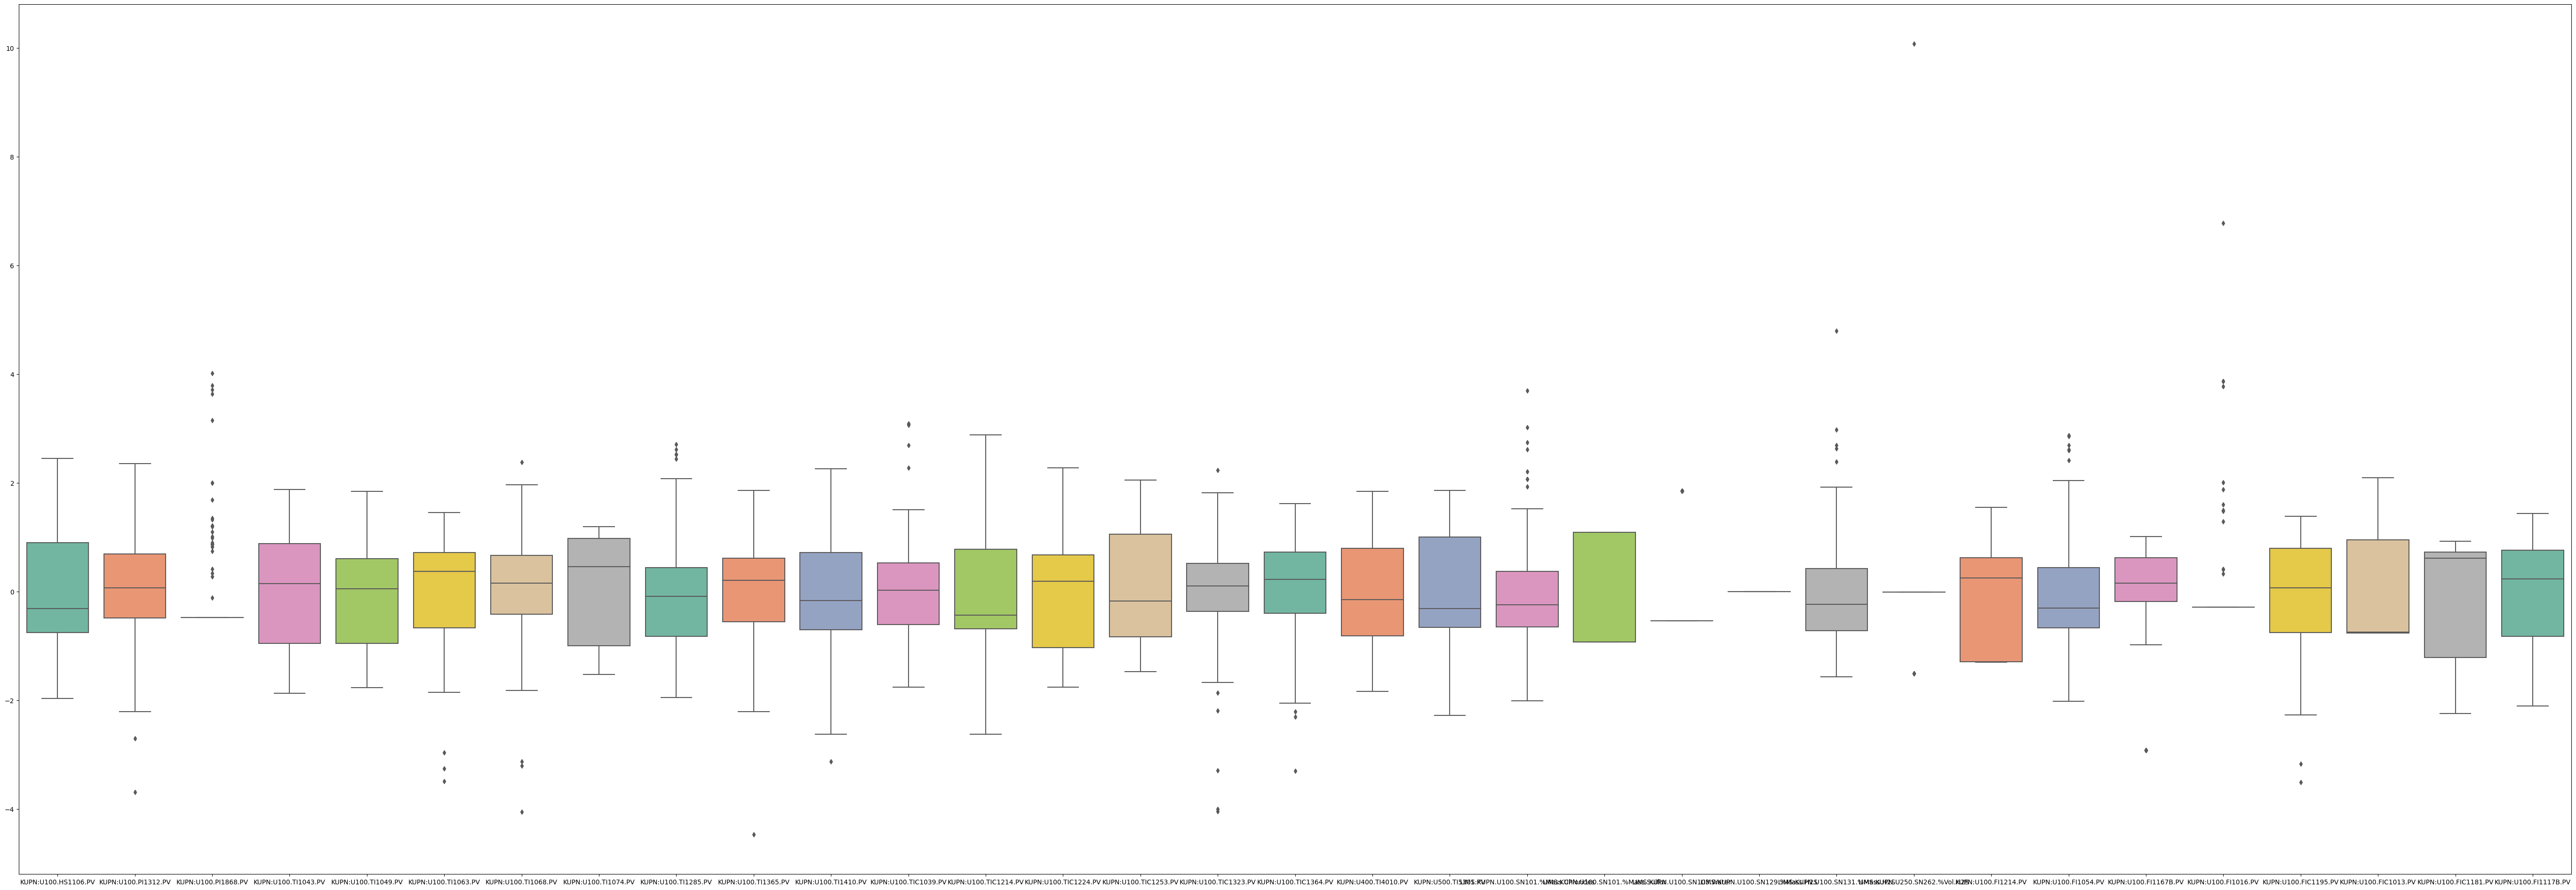

In [ ]:
fig, ax = plt.subplots(figsize=(70, 24))
plot_df_needH2S = sns.boxplot(data=df_needH2S, orient="v", palette="Set2")
plot_df_needH2S

In [ ]:
regrH2S.predict(X)

In [ ]:
new_multi_df = df_needChlion.filter(items=df_needChlion.columns.intersection(df_needH2S.columns))
new_multi_df

In [ ]:
fig, ax = plt.subplots(figsize=(24, 24))
plot_new_multi_df = sns.boxplot(data=new_multi_df, orient="v", palette="Set2")
plot_new_multi_df

#Вариант 1: мультирегрессор отфильтрованный

In [ ]:
#название_модели(своё) = название модели(линейная регрессия, нейросеть и тд)(ГИПЕРПАРАМЕТРЫ).fit(X_train, )

In [ ]:
train_col = new_multi_df
tg_col = df[['LIMS:KUPN.U100.V107.H2S', 'LIMS:KUPN.U100.V107.ChlIons']]
X = train_col
Y = tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
Multi_filter = MultiOutputRegressor(ElasticNetCV(cv=17, random_state=0, max_iter=10000, n_jobs =-1)).fit(X_train, Y_train)
Multi_filter.score(X_test, Y_test)

0.10998126019146137

# Вариант 2: Регрессор, построенный на дереве решений

[Text(0.4444444444444444, 0.9, 'x[11] <= -0.565\nsquared_error = 0.955\nsamples = 80\nvalue = 0.02'),
 Text(0.2222222222222222, 0.7, 'x[15] <= -0.21\nsquared_error = 0.415\nsamples = 21\nvalue = -0.776'),
 Text(0.1111111111111111, 0.5, 'squared_error = 0.277\nsamples = 11\nvalue = -0.478'),
 Text(0.3333333333333333, 0.5, 'squared_error = 0.361\nsamples = 10\nvalue = -1.104'),
 Text(0.6666666666666666, 0.7, 'x[13] <= -0.86\nsquared_error = 0.841\nsamples = 59\nvalue = 0.304'),
 Text(0.5555555555555556, 0.5, 'squared_error = 0.751\nsamples = 17\nvalue = 1.139'),
 Text(0.7777777777777778, 0.5, 'x[30] <= -0.761\nsquared_error = 0.481\nsamples = 42\nvalue = -0.034'),
 Text(0.6666666666666666, 0.3, 'x[3] <= -0.597\nsquared_error = 0.427\nsamples = 27\nvalue = 0.171'),
 Text(0.5555555555555556, 0.1, 'squared_error = 0.189\nsamples = 10\nvalue = 0.643'),
 Text(0.7777777777777778, 0.1, 'squared_error = 0.358\nsamples = 17\nvalue = -0.108'),
 Text(0.8888888888888888, 0.3, 'squared_error = 0.368\

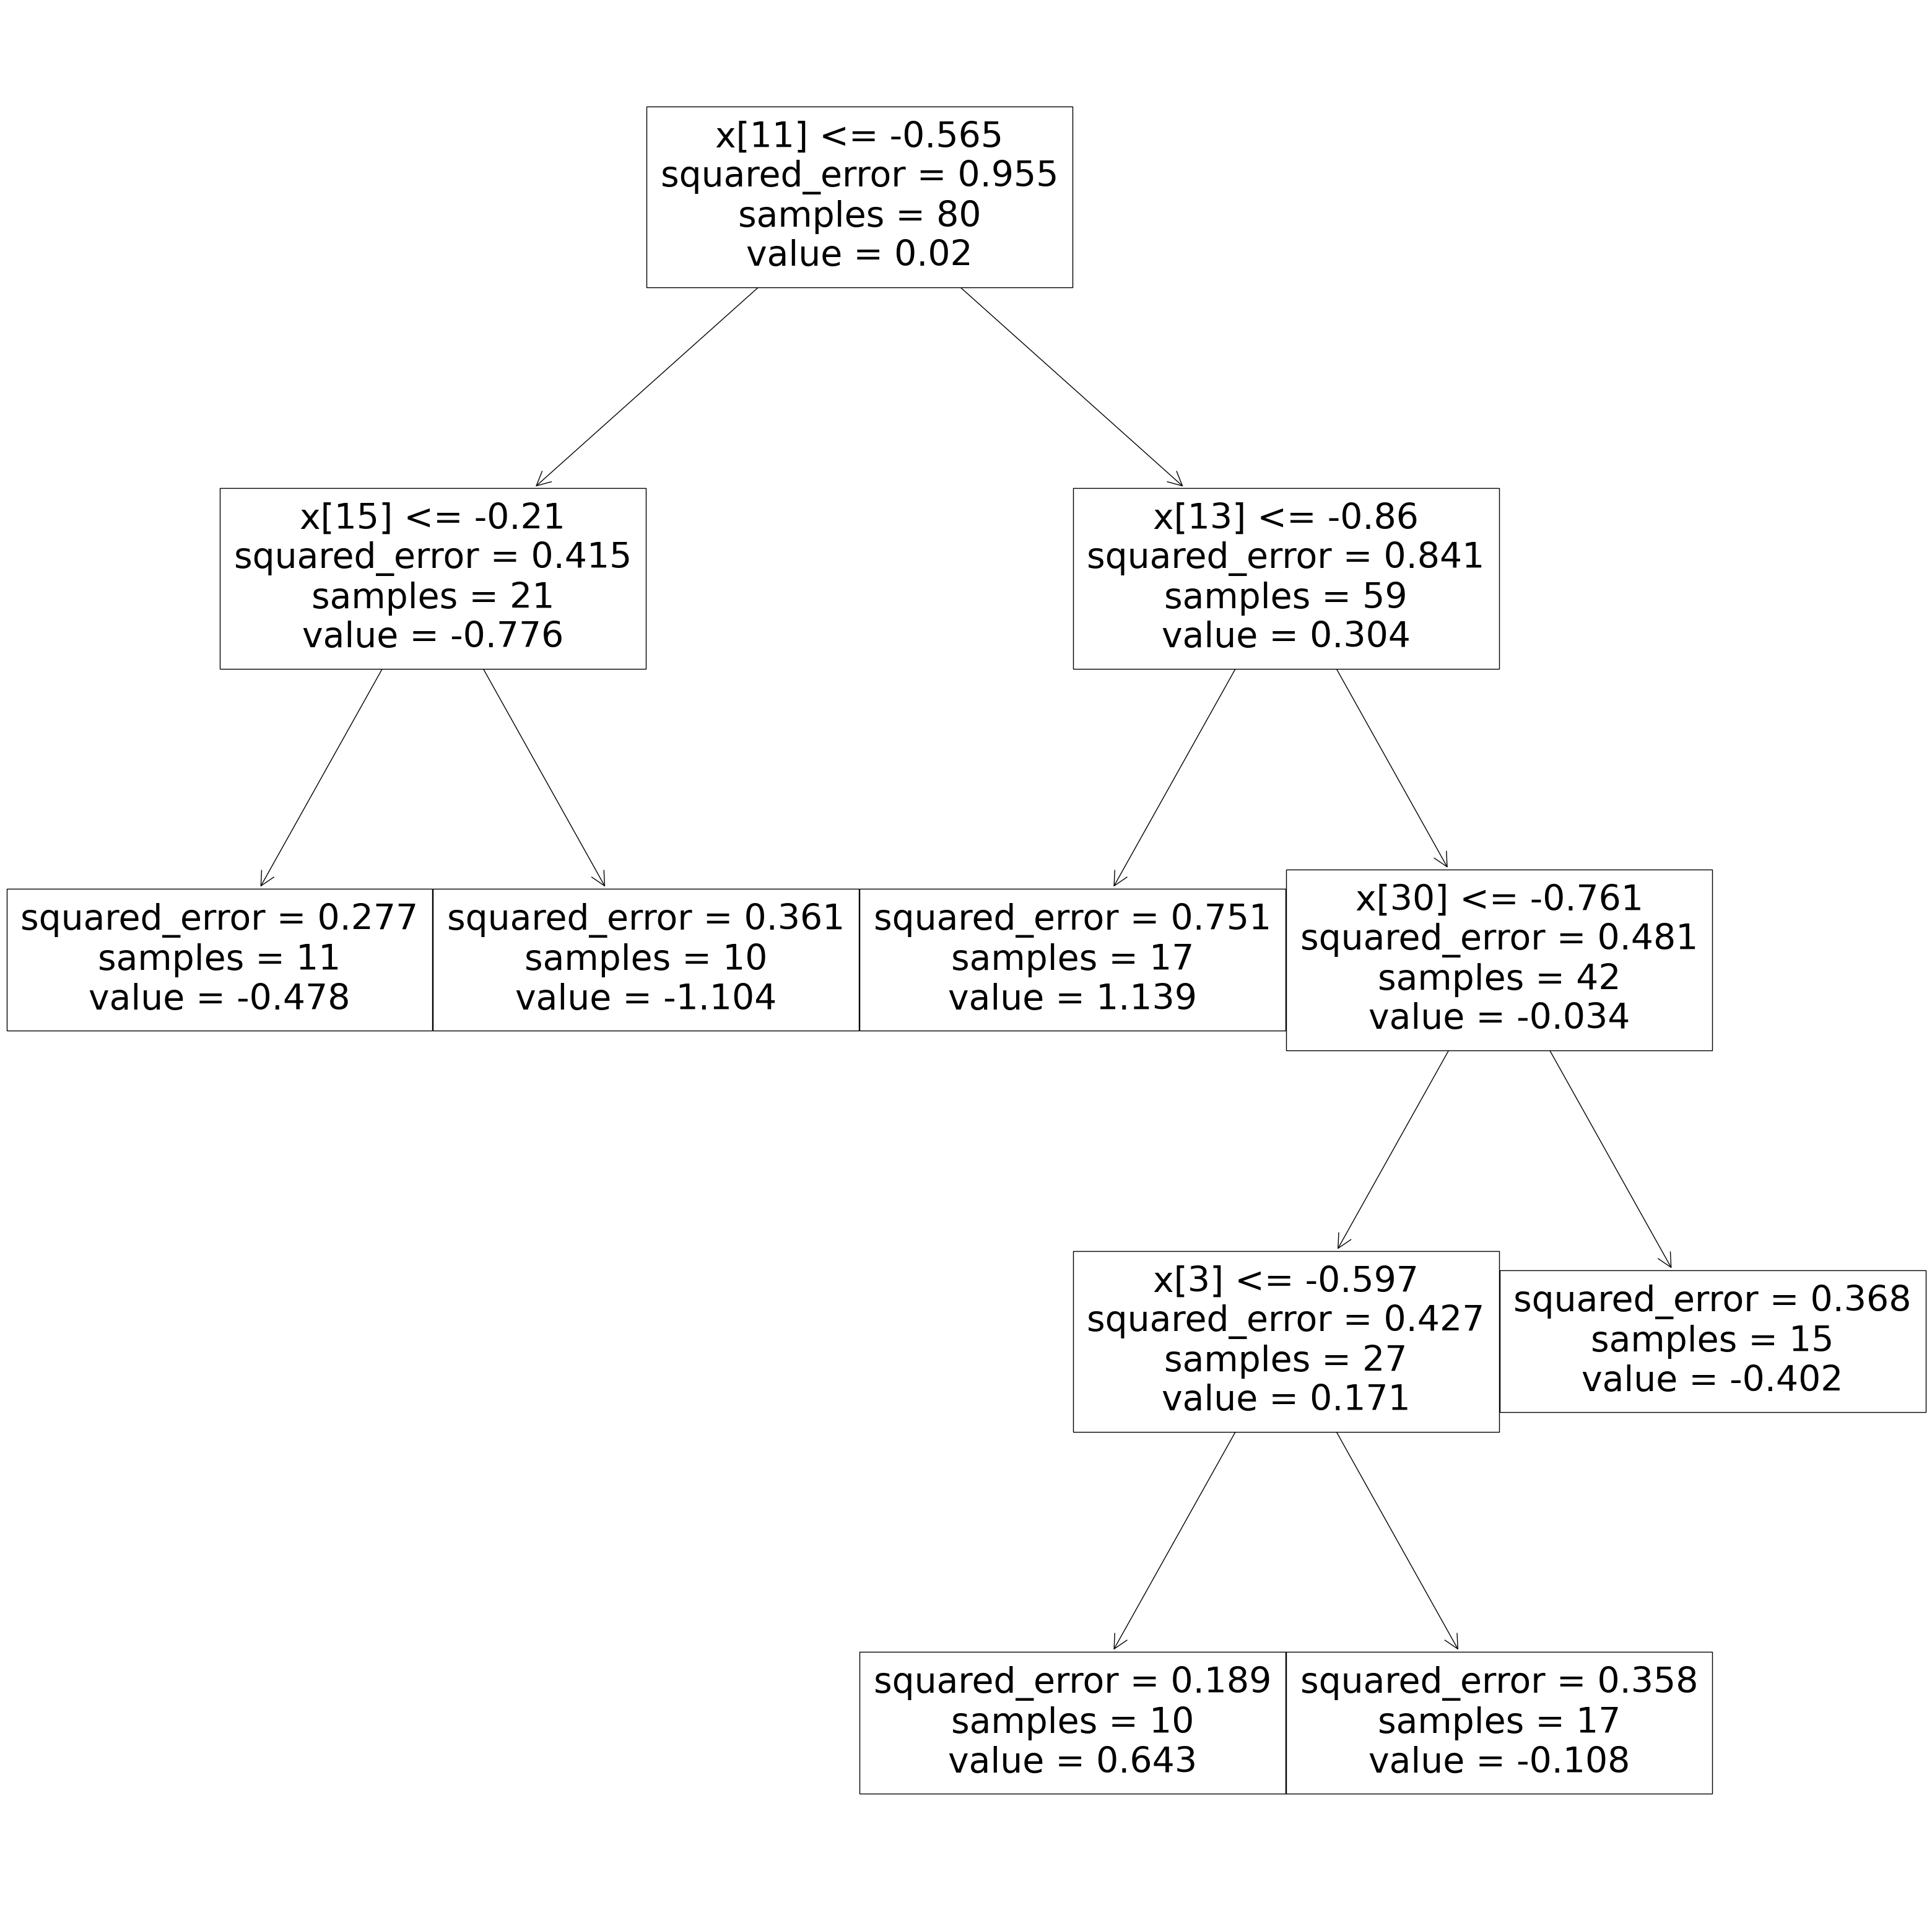

In [ ]:
#для H2S
X = df_needH2S
tg_col = df[['LIMS:KUPN.U100.V107.H2S']]
Y= tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
regressorH2S = DecisionTreeRegressor(max_depth=15, min_samples_leaf=10)
regressorH2S.fit(X_train, Y_train)
regressorH2S.score(X_test, Y_test)
plt.figure(figsize=(40, 40))
plot_tree(regressorH2S)

In [ ]:
regressorH2S.score(X_test, Y_test)

-0.1499362191853313

[Text(0.5, 0.875, 'x[12] <= -0.221\nsquared_error = 1.052\nsamples = 80\nvalue = -0.031'),
 Text(0.2, 0.625, 'x[9] <= 0.369\nsquared_error = 0.489\nsamples = 40\nvalue = -0.478'),
 Text(0.1, 0.375, 'squared_error = 0.406\nsamples = 16\nvalue = -0.02'),
 Text(0.3, 0.375, 'x[24] <= 1.331\nsquared_error = 0.311\nsamples = 24\nvalue = -0.784'),
 Text(0.2, 0.125, 'squared_error = 0.314\nsamples = 12\nvalue = -0.558'),
 Text(0.4, 0.125, 'squared_error = 0.204\nsamples = 12\nvalue = -1.011'),
 Text(0.8, 0.625, 'x[15] <= -0.744\nsquared_error = 1.214\nsamples = 40\nvalue = 0.416'),
 Text(0.7, 0.375, 'x[7] <= 0.853\nsquared_error = 0.807\nsamples = 26\nvalue = 0.1'),
 Text(0.6, 0.125, 'squared_error = 1.337\nsamples = 12\nvalue = 0.506'),
 Text(0.8, 0.125, 'squared_error = 0.09\nsamples = 14\nvalue = -0.249'),
 Text(0.9, 0.375, 'squared_error = 1.441\nsamples = 14\nvalue = 1.002')]

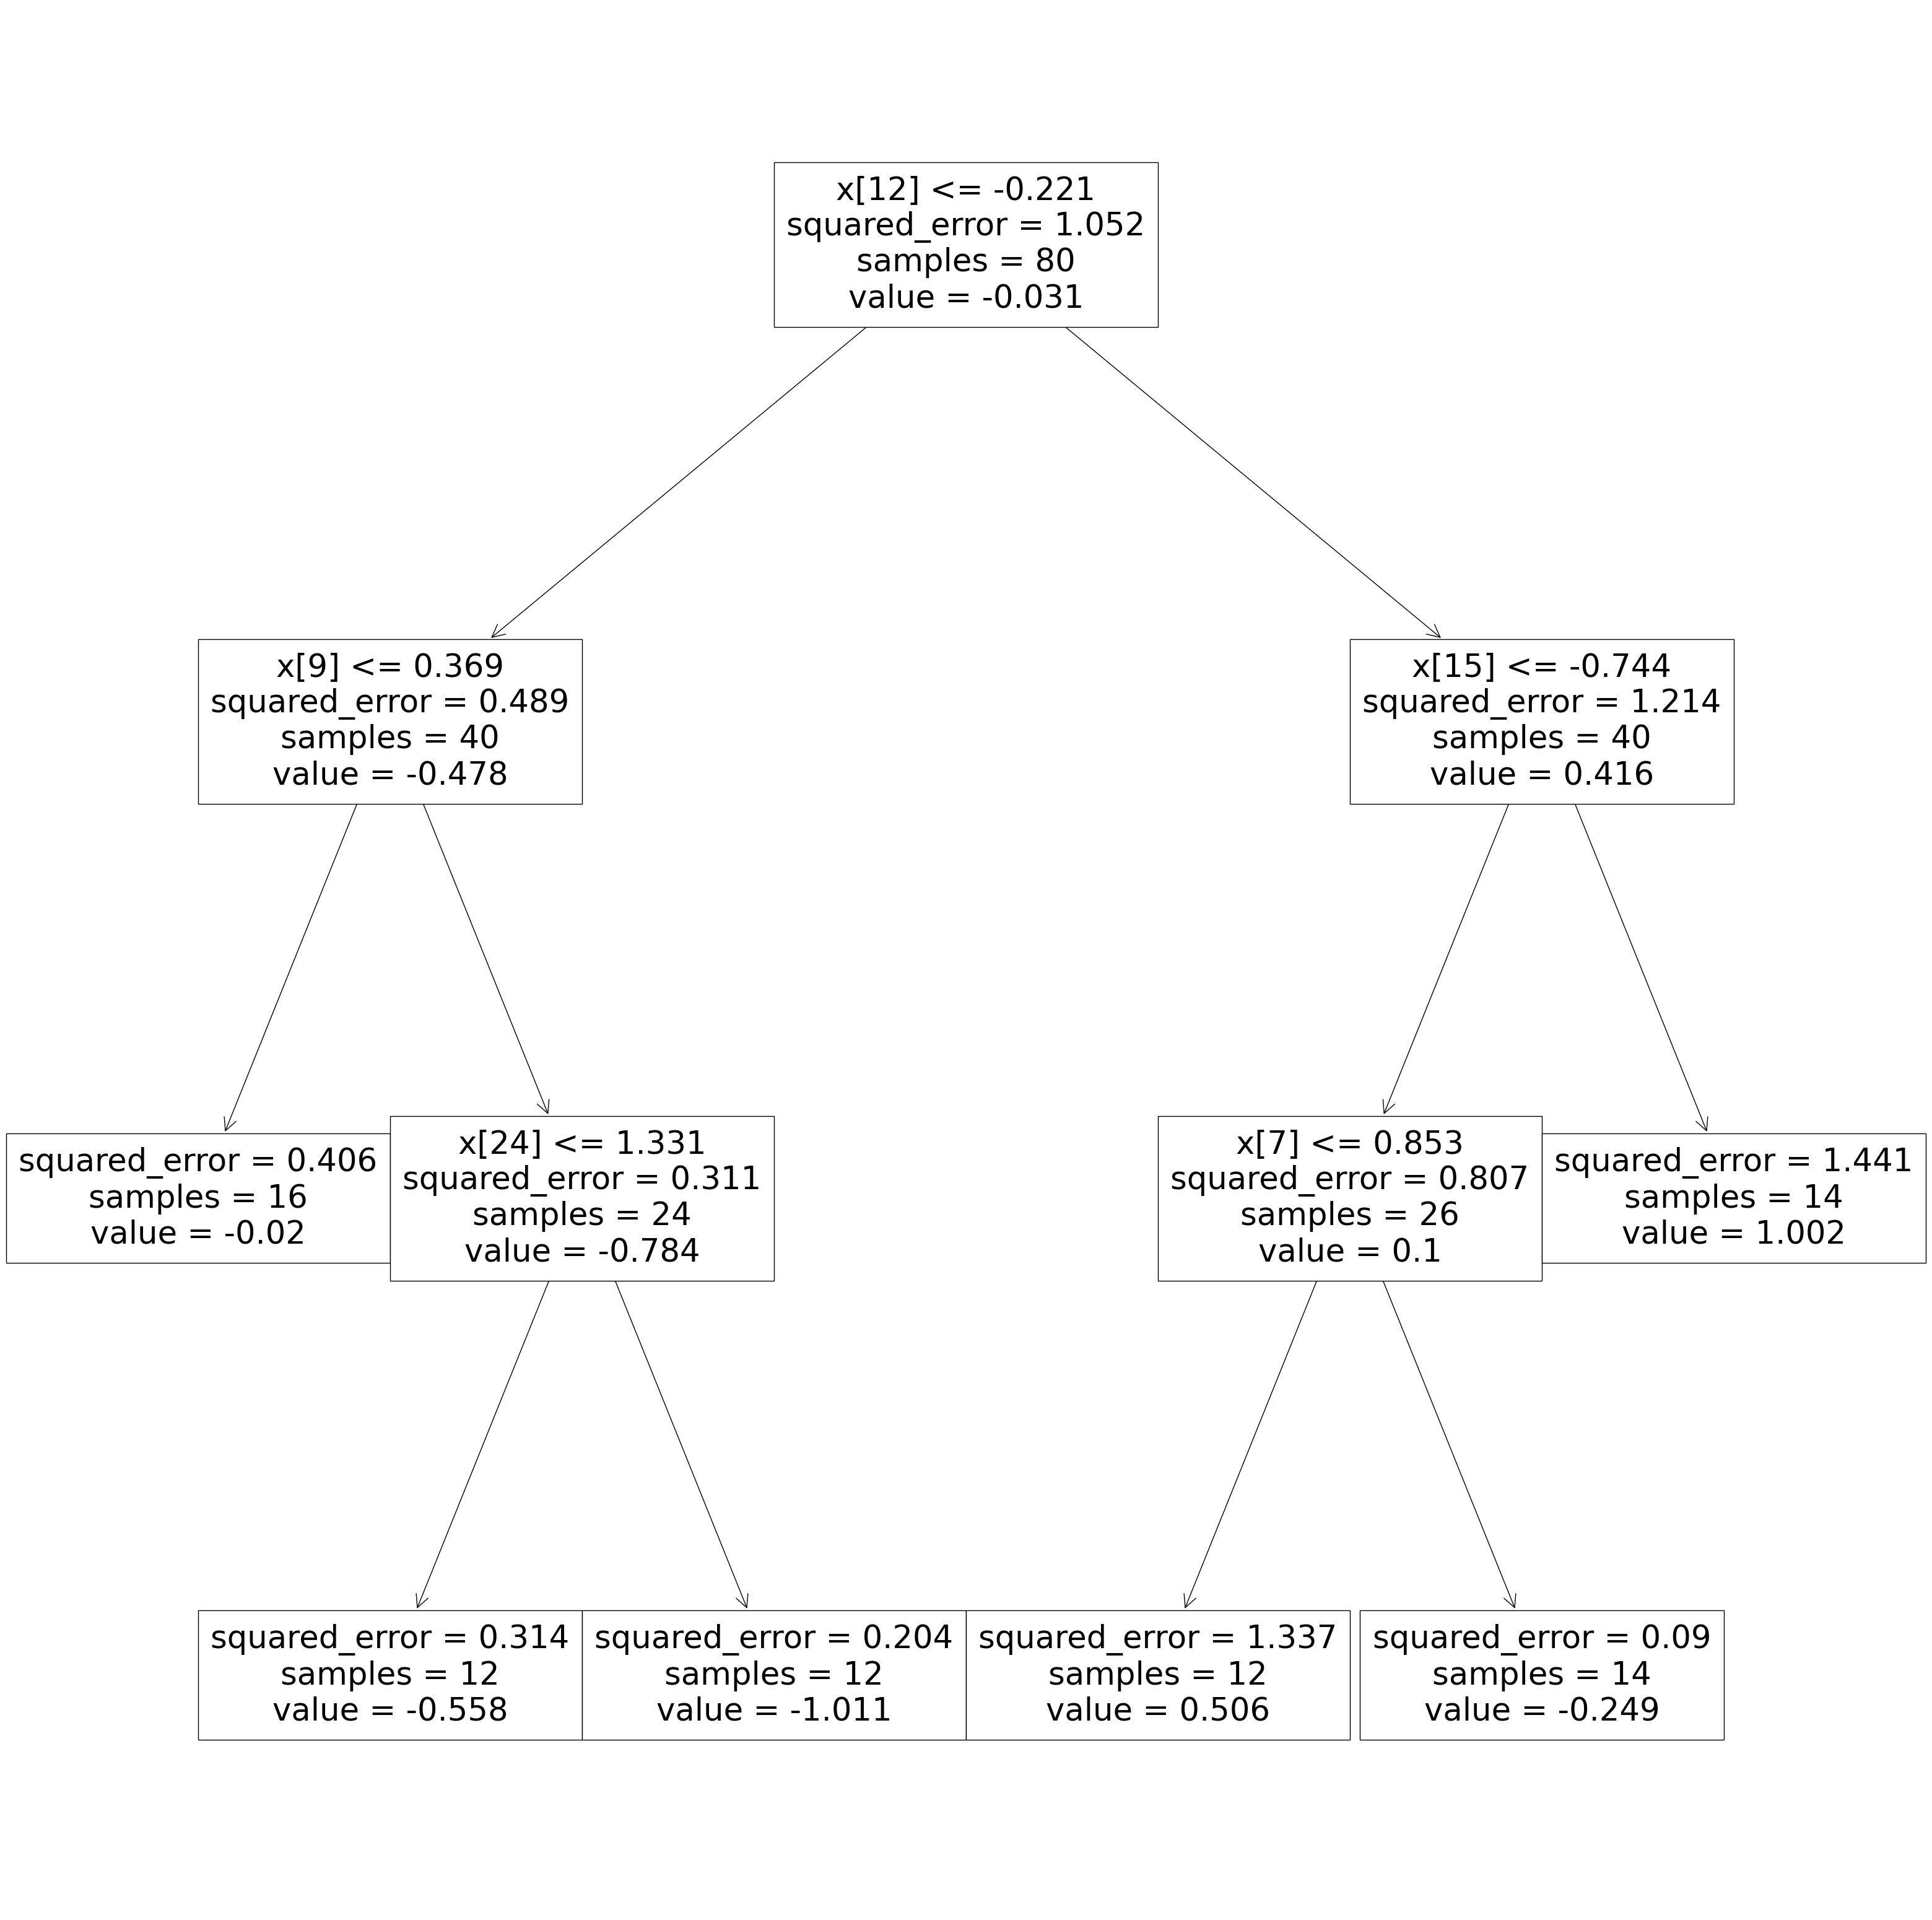

In [ ]:
#Для Chlion
X = df_needChlion
tg_col = df[['LIMS:KUPN.U100.V107.ChlIons']]
Y= tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
regressorChl = DecisionTreeRegressor(max_depth=4, min_samples_leaf=12)
regressorChl.fit(X_train, Y_train)
regressorChl.score(X_test, Y_test)
plt.figure(figsize=(40, 40))
plot_tree(regressorChl)

In [ ]:
regressorChl.score(X_test, Y_test)

0.06142594662725798

# Вариант 3: Нейросеть (перцептрон)

In [ ]:
#для H2S
X = df_needH2S
tg_col = df[['LIMS:KUPN.U100.V107.H2S']]
Y= tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
regressor = MLPRegressor(hidden_layer_sizes=7, max_iter=2000, alpha = 0.0001, momentum = 0.1, solver = 'sgd')
regressor.fit(X_train, Y_train.values.ravel())
regressor.score(X_test,Y_test)

0.2605767047148331

In [ ]:
#Для Chlion
X = df_needChlion
tg_col = df[['LIMS:KUPN.U100.V107.ChlIons']]
Y= tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
regressor = MLPRegressor(hidden_layer_sizes=7, max_iter=2000)
regressor.fit(X_train, Y_train.values.ravel())
regressor.score(X_test, Y_test)

-4.344386587826956

#Вариант 4: мультирегрессор обычный

In [ ]:
train_col = df.drop(['LIMS:KUPN.U100.V107.ChlIons', 'LIMS:KUPN.U100.V107.H2S'], axis=1)
tg_col = df[['LIMS:KUPN.U100.V107.H2S', 'LIMS:KUPN.U100.V107.ChlIons']]
X = train_col
Y = tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
Multik = MultiOutputRegressor(ElasticNetCV(cv=17, random_state=0, max_iter=10000, n_jobs =-1)).fit(X_train, Y_train)
Multik.score(X_test, Y_test)

0.390214364165134

#Вариант 5: Лес деревьев

In [ ]:
X = df_needChlion
tg_col = df[['LIMS:KUPN.U100.V107.ChlIons']]
Y= tg_col
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=47)
random_forest = RandomForestRegressor(n_estimators=200, random_state=42, min_samples_leaf = 4)
# Обучение модели на обучающем наборе
random_forest.fit(X_train, Y_train.values.ravel())
random_forest.score(X_test, Y_test)

0.2705789730677316